In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/labeled_lyrics_cleaned.csv')
df.head(5)

,Unnamed: 0,artist,seq,song,label
0,0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.626
1,1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,0.630
2,2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside,0.240
3,3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,0.536
4,4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158353 entries, 0 to 158352
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  158353 non-null  int64  
 1   artist      158353 non-null  object 
 2   seq         158353 non-null  object 
 3   song        158351 non-null  object 
 4   label       158353 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
artist,0
seq,0
song,2
label,0


In [ ]:
duplicates = df[df.duplicated(subset=['artist', 'song'], keep=False)]
print(duplicates)

        Unnamed: 0                artist  \
477            477       Ella Fitzgerald   
8762          8762             John Rich   
9813          9813         Andy Williams   
9814          9814         Andy Williams   
9904          9904         Andy Williams   
...            ...                   ...   
141742      141742             John Rich   
147513      147513  Mannheim Steamroller   
147526      147526  Mannheim Steamroller   
155213      155213            The Police   
155274      155274            The Police   

                                                      seq  \
477     O holy night, the stars are brightly shining\r...   
8762    What's up y'all? This is Kid Rock\r\nTurn it u...   
9813    Honey babe (ooh ha), oh honey babe (ooh ha)\r\...   
9814    Where's this place called lonely street?\r\n\r...   
9904    So rare, so rare\r\nSo rare, so rare\r\n\r\nSo...   
...                                                   ...   
141742  What's up y'all? This is Kid Rock\r\

In [ ]:
df.shape

(158353, 5)

In [ ]:
lyrics=df.drop(['Unnamed: 0'],axis=1)
lyrics.head(5)


,artist,seq,song,label
0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.626
1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,0.630
2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside,0.240
3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,0.536
4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371


In [ ]:
# Define a function to label valence values
def label_valence(valence):
    if valence < 0.5:
        return 'Negative'
    elif valence == 0.5:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to create a new column 'Valence_Label'
lyrics['category_Label'] = lyrics['label'].apply(label_valence)

# Check the first few rows to see the new column
print(lyrics[['label', 'category_Label']].head())


   label category_Label
0  0.626       Positive
1  0.630       Positive
2  0.240       Negative
3  0.536       Positive
4  0.371       Negative


In [ ]:
category_counts=lyrics['category_Label'].value_counts()
print(category_counts)

category_Label
Negative    82413
Positive    75745
Neutral       195
Name: count, dtype: int64


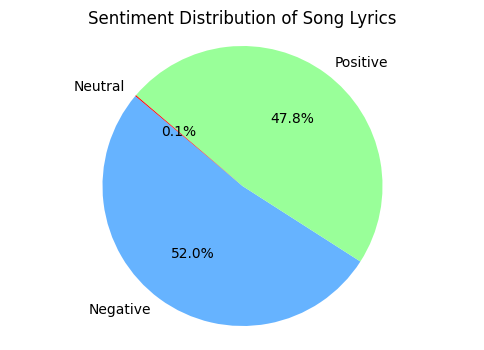

In [ ]:
# Assuming 'sentiment' column exists with values like 'positive', 'negative', 'neutral'
sentiment_counts = lyrics['category_Label'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','red'])
plt.title('Sentiment Distribution of Song Lyrics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
lyrics.dropna(subset=['seq'],inplace=True)

In [ ]:
lyrics.drop_duplicates(subset=["song", "artist"], inplace=True)
lyrics.shape

(158312, 5)

In [ ]:
lyrics['seq'] =lyrics['seq'].str.lower()

In [ ]:
total_word_count = lyrics['seq'].str.split().str.len().sum()
print(f"Total word count: {total_word_count}")

Total word count: 34761989


In [ ]:
import re
import html

# Define the strip_html_tags function
def strip_html_tags(text):
    # Remove HTML tags
    stripped_text = re.sub(r'<[^>]+>', '', text)
    # Unescape HTML entities
    stripped_text = html.unescape(stripped_text)
    return stripped_text

# Applying it to the 'seq' (lyrics) column in your dataset
lyrics['seq'] = lyrics['seq'].apply(strip_html_tags)

In [ ]:
def removeAllInvalid(text):
    # Define valid extensions to keep
    valid_extensions = r'\b(?:yeah|ohh|na|ta|la|ya)\b'
    pattern = r'\b(?:ohh+|hah+|na+|yeah+|ahh+|la+|woo+|ooh+)\b'

    # Remove <br /> tags and replace with a space
    text = text.replace("<br />", " ")

    # Remove special characters, except for whitespace and valid extensions
    text = re.sub(r'[^\w\s]', '', text)

    # Keep valid extensions, removing surrounding punctuation
    text = re.sub(r'(?<!\w)(' + valid_extensions + r')(?!\w)', r'\1', text)
    text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    # Remove newlines, tabs, etc.
    text = re.sub(r'[\r\n\t]+', ' ', text)

    # Remove multiple spaces
    text = re.sub(r'\s{2,}', ' ', text)

    # Strip leading and trailing spaces
    return text.strip()

# Apply the removeAllInvalid function to the 'seq' column
lyrics['seq'] = lyrics['seq'].apply(removeAllInvalid)

In [ ]:
pattern = r'\b(?:ohh+|hah+|na+|yeah+|ahh+|la+|woo+|oh+|ta+|ya+|hey+|go|im)\b'

# Remove the specified word patterns from 'filtered_seq'
lyrics['seq'] = lyrics['seq'].str.replace(pattern, '', regex=True)

In [ ]:
lyrics.head(5)

,artist,seq,song,label,category_Label
0,Elijah Blake,no no i aint ever trapped out the bando but l...,Everyday,0.626,Positive
1,Elijah Blake,the drinks down and smoke goes up i feel myse...,Live Till We Die,0.630,Positive
2,Elijah Blake,she dont live on planet earth no more she foun...,The Otherside,0.240,Negative
3,Elijah Blake,trippin off that grigio mobbin lights low trip...,Pinot,0.536,Positive
4,Elijah Blake,i see a midnight panther so gallant and so bra...,Shadows & Diamonds,0.371,Negative


In [ ]:
# Access the 'seq' column's value from row 1 (index 0)
lyrics['seq'].iloc[0]


'no no i aint ever trapped out the bando but  lord dont get me wrong i know a couple niggas that do  from a place where everybody knows your name they say i gotta watch my attitude when they see money man they all start actin strange so fuck with the ones that fuck with you they can never say  brand new its everyday everyday everyday everyday everyday everyday everyday everyday everyday ive been talkin my shit nigga thats regular ive been lovin em thick life is spectacular i spend like ima die rich nigga  flexin everyday thats everyday thats everyday thats everyday thats everyday everyday i see all of these wannabe hot rb singers i swear you all sound the same they start from the bottom so far from the motto you niggasll never be drake shout out to ovo most of them prolly dont know me though i stay in the cut i dont fuck with no body but i d thats a pun on no id when nobody know my name runnin for my dream wasnt hard to do you break bread i swear they all pull out a plate eat with the 

In [ ]:
!pip install langid

import langid

def detect_language_langid(text):
    lang, _ = langid.classify(text)
    return lang if len(text.strip()) > 2 else 'unknown'

lyrics['language'] = lyrics['seq'].apply(detect_language_langid)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=142214923ea096060aac89a49edec6c6cb35f9d626bfd374d2b3058a283a6e58
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
songs = lyrics[lyrics['language'] == 'en']

In [ ]:
songs.shape

(156705, 6)

In [ ]:
songs.head(5)

,artist,seq,song,label,category_Label,language
0,Elijah Blake,no no i aint ever trapped out the bando but l...,Everyday,0.626,Positive,en
1,Elijah Blake,the drinks down and smoke goes up i feel myse...,Live Till We Die,0.630,Positive,en
2,Elijah Blake,she dont live on planet earth no more she foun...,The Otherside,0.240,Negative,en
3,Elijah Blake,trippin off that grigio mobbin lights low trip...,Pinot,0.536,Positive,en
4,Elijah Blake,i see a midnight panther so gallant and so bra...,Shadows & Diamonds,0.371,Negative,en


In [ ]:
!pip install tensorflow
!pip install keras
!pip install nltk
import pickle
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

# Initialize the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the 'seq' column (where your lyrics are stored)
tokenizer.fit_on_texts(songs['seq'])

# Convert text to sequences (tokenized form)
sequences = tokenizer.texts_to_sequences(songs['seq'])

# Save the tokenizer using pickle for future use
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)




Stop Word removal (Optional)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

custom_stopwords = {'let', 'thats', 'dont','know','go','youre','come','want','wanna','gonna','take','found','u','wan','gon'}
stop_words.update(custom_stopwords)

# Function to remove stop words from a text
def remove_stop_words(text):
    words = word_tokenize(text.lower())
    return ' '.join(word for word in words if word not in stop_words)

# Apply to your dataset
songs['seq'] = songs['seq'].apply(remove_stop_words)

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng') # This line downloads the english tagger, required for nltk.pos_tag

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Helper function to get the correct POS tag for lemmatization
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function to lemmatize a text
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)])

# Apply lemmatization to your 'seq' column
songs['filtered_seq'] = songs['seq'].apply(lemmatize_text)

# Now you can use the lemmatized text for further processing
sequences = tokenizer.texts_to_sequences(['filtered_seq'])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
<ipython-input-30-3eb4421e8911>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['filtered_seq'] = songs['seq'].apply(lemmatize_text)


In [ ]:
songs.head()

,artist,seq,song,label,category_Label,language,filtered_seq
0,Elijah Blake,no no i aint ever trapped out the bando but l...,Everyday,0.626,Positive,en,no no i aint ever trap out the bando but lord ...
1,Elijah Blake,the drinks down and smoke goes up i feel myse...,Live Till We Die,0.630,Positive,en,the drink down and smoke go up i feel myself g...
2,Elijah Blake,she dont live on planet earth no more she foun...,The Otherside,0.240,Negative,en,she dont live on planet earth no more she foun...
3,Elijah Blake,trippin off that grigio mobbin lights low trip...,Pinot,0.536,Positive,en,trippin off that grigio mobbin light low tripp...
4,Elijah Blake,i see a midnight panther so gallant and so bra...,Shadows & Diamonds,0.371,Negative,en,i see a midnight panther so gallant and so bra...


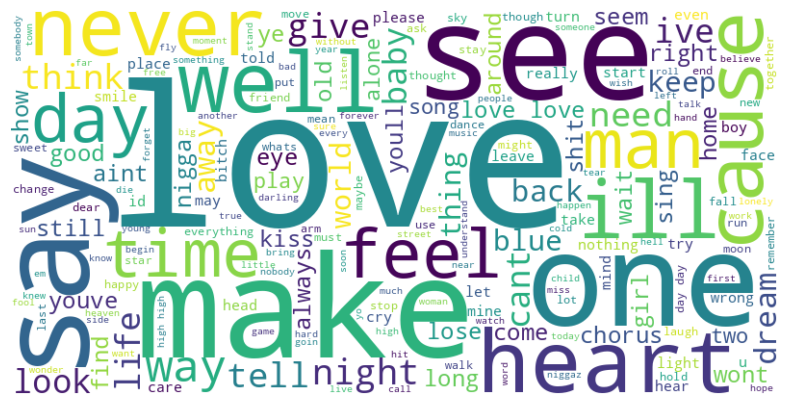

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the tokenized words into a single string
all_words = ' '.join(songs['filtered_seq'])

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Using only first 1000 song lyrics for Buliding the models  

In [ ]:
songs = songs.head(10000)
songs.to_csv('songs_1000.csv', index=False)

NOTE: Note: In this sentiment analysis task, I have intentionally retained stop words. While stop words are often removed in text preprocessing, they can carry significant meaning in sentiment analysis. For instance:

"I am happy" and "I am not happy" convey entirely different sentiments.
The word "not", a stop word, is critical for distinguishing the positive sentiment in the first sentence from the negative sentiment in the second.